# Capstone code
This will need to be pasted into the .py file before submission...

As we started to look at this data, we started to get more and more curious about Zodiac signs. First, we looked at all of the possible values for Zodiac signs:

We started to wonder if there was a way to predict a user's Zodiac sign from the information in their profile. Thinking about the columns we had already explored, we thought that maybe we could classify Zodiac signs using drinking, smoking, drugs, and essays as our features.

## We want to see:

- (done) at least two graphs containing exploration of the dataset
- a statement of your question (or questions!) and how you arrived there 
- (done?) the explanation of at least two new columns you created and how you did it
- (done) the comparison between two classification approaches, including a qualitative discussion of simplicity, time to    run the model, and accuracy, precision, and/or recall
- the comparison between two regression approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall
- an overall conclusion, with a preliminary answer to your initial question(s), next steps, and what other data you would like to have in order to better answer your question(s)

### Classification (K- nearest neighbors, Support Vector Machnines, Naive Bayes)
- Can we predict sex with education level and income??
- Can we predict education level with essay text word counts?

### Regression (Multiple Linear Regression -Street Easy)
- Predict income with length of essays and average word length?
- Predict age with the frequency of "I" or "me" in essays?

### Analyze the Accuracy, Precision and Recall
- Find the accuracy, precision, and recall of each model you used, and create graphs showing how they changed.

In [38]:
#Import Libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor

"""
Function to iterate through df.sign linking similarly named responses to their sign 
(eg "libra and its fun to think about" links to "libra" and mapped to value of 1)
"""
def zodiac_map(linked_list):
    sign = ""
    for key in zodiac_mapping:
        if key in linked_list:
            sign = zodiac_mapping[key]
            break
    return sign

#Load data into dataframe and explore the column headings
df = pd.read_csv("profiles.csv")
# print(df.columns.values)

#Print Age distribution using histogram
# plt.hist(df.age, bins=20)
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.xlim(16, 80)
# plt.show()

#Print possible responses to zodiac sign
# print(df.sign.value_counts())

#Map non-numerical data to a 'code' to represent different responses
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping, na_action='ignore')
smokes_mapping = {"no": 0, "sometimes": 1, "yes": 2,"trying to quit": 3}
df["smokes_code"] = df.smokes.map(smokes_mapping, na_action='ignore')
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping, na_action='ignore')
zodiac_mapping = {"leo": 0, "libra": 1, "cancer": 2, "virgo": 3, "scorpio": 4, "gemini": 5, "taurus": 6, "aries": 7, "pisces": 8, "aquarius": 9, "sagittarius": 10, "capricorn": 11, "na": 12}
df['zodiac_code'] = df.sign.replace(np.nan, 'na', regex=True).apply(zodiac_map)



# Question - Can we predict the users sex with education level and income?

- K-Nearest Neighbors

Vs

- Naive Bayes Classifier

m    35829
f    24117
Name: sex, dtype: int64


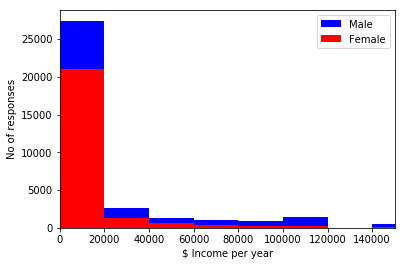

/home/mim212/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


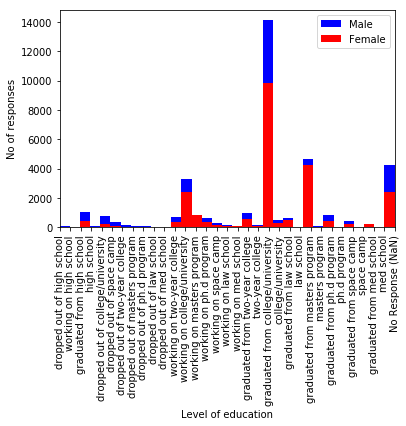

In [3]:
#Map non-numerical data to a 'code' to represent different responses
sex_mapping = {"m": 0, "f": 1}
df["sex_code"] = df.sex.map(sex_mapping, na_action='ignore')

education_mapping = {
"dropped out of high school": 0,
"working on high school": 1,
"graduated from high school": 2,
"high school": 3,
"dropped out of college/university": 4,
"dropped out of space camp": 5,
"dropped out of two-year college": 6,
"dropped out of masters program": 7,
"dropped out of ph.d program": 8,
"dropped out of law school": 9,
"dropped out of med school": 10,
"working on two-year college": 11,
"working on college/university": 12,
"working on masters program": 13,
"working on ph.d program": 14,
"working on space camp": 15,
"working on law school": 16,
"working on med school": 17,
"graduated from two-year college": 18,
"two-year college": 19,
"graduated from college/university": 20,
"college/university": 21,
"graduated from law school": 22,
"law school": 23,
"graduated from masters program": 24,
"masters program": 25,
"graduated from ph.d program": 26,
"ph.d program": 27,
"graduated from space camp": 28, 
"space camp": 29,
"graduated from med school": 30,
"med school": 31,
"No Response (NaN)": 32
}
df["education_code"] = df.education.map(education_mapping).fillna(32)

#Create list of education levels for plot labels
edu_list = []
for i in range(len(education_mapping)):
    edu_list.append(education_mapping.keys()[education_mapping.values().index(i)])

#Print the number of male and female responses
print(df.sex.value_counts())   

#Seperate education and income based on sex to test for correlation
edu_m = df.education_code[df['sex'] == 'm']
edu_f = df.education_code[df['sex'] == 'f']
inc_m = df.income[df['sex'] == 'm']
inc_f = df.income[df['sex'] == 'f']

#Plot income based on sex
plt.hist(inc_m, bins =50, color='blue')
plt.hist(inc_f, bins =50, color='red')
plt.xlabel("$ Income per year")
plt.ylabel("No of responses")
plt.xlim(0, 150000)
plt.legend(["Male", "Female"])
plt.show()

#Plot education based on sex
plt.hist(edu_m, bins =33, color='blue')
plt.hist(edu_f, bins =33, color='red')
ax = plt.subplot()
plt.xlabel("Level of education")
plt.ylabel("No of responses")
ax.set_xticks(range(len(edu_list)))
ax.set_xticklabels(edu_list)
plt.xticks(rotation=90)
plt.xlim(0, 32)
plt.legend(["Male", "Female"])
plt.show()


In [4]:
"""
The below function spans k-values and tests for accuracy. 
The most accurate k-value is then printed on the console.
Inputs: k_max = highest k value the function will test for
"""

def Accuracy_Span_KClassifier(k_max):   
    k_list = range(1,k_max)
    accuracies = []
    max_acc = 0
    max_acc_k = 0
    #Loop though all k-values up to k-max, listing the accuracy of each result
    for k in k_list:
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(training_data, training_labels)
        accuracy = classifier.score(validation_data, validation_labels)
        #Find max accuracy and record the k-value
        if accuracy > max_acc:
            max_acc = accuracy
            max_acc_k = k
        accuracies.append(accuracy)
    
    #Plot the results of the accuracy changing with k values
    plt.plot(k_list, accuracies, color='purple')
    plt.xlabel('k')
    plt.ylabel('Validation Accuracy')
    plt.title("K Neighbors Accuracy")
    plt.show()
    print("Max accuracy found at k=%s" % max_acc_k)
    
#Normalise data using z-score normalisation to remove outliers (e.g. $1000000 income)
norm_income = zscore(df.income)
norm_edu = zscore(df.education_code)

#Offsetting z-scores to remove negitive values (issue with Naive Bayes Classifier)
norm_income = [x+1 for x in norm_income]
norm_edu = [x+3 for x in norm_edu]

#Combine the education level and salary into one array for testing
income_education = zip(norm_edu, norm_income)

#Split the sample data into training and validation sets (note: test size = 20%)
(training_data, validation_data, training_labels, validation_labels) = train_test_split(income_education, df.sex_code, test_size = 0.2, random_state = 42)

#Find Ideal k value (commented to reduce loading times)
# Accuracy_Span_KClassifier(50)

#Define K Neighbors Classifier (with previously found best k-value) and test accuracy
classifier_kneigh = KNeighborsClassifier(n_neighbors = 26)
classifier_kneigh.fit(training_data, training_labels)

print("Accuracy of K-Nearest Neighbors Classifier: %s" % classifier_kneigh.score(validation_data, validation_labels))

#Define Naive Bayes Classifier and test accuracy
classifier_nb = MultinomialNB()
classifier_nb.fit(training_data, training_labels)

print("Accuracy of Naive Bayes Classifier: %s" % classifier_nb.score(validation_data, validation_labels))

Accuracy of K-Nearest Neighbors Classifier: 0.5932443703085905
Accuracy of Naive Bayes Classifier: 0.5899916597164303


# Question - Can we predict the users age with Income and job?

- Multiple Linear Regression 

Vs

- KNeighbors Regressor

MLR training score: 0.02006642045688578 
MLR validation score: 0.0166289702084228 


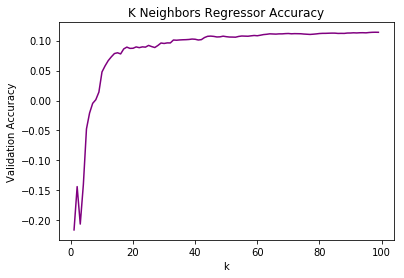

Max accuracy found at k=98
KNeighbors validation score: 0.08714431764006969 


In [44]:
"""
The below function spans k-values and tests for accuracy. 
The most accurate k-value is then printed on the console.
Inputs: k_max = highest k value the function will test for
"""

def Accuracy_Span_KRegressor(k_max):   
    k_list = range(1,k_max)
    accuracies = []
    max_acc = 0
    max_acc_k = 0
    #Loop though all k-values up to k-max, listing the accuracy of each result
    for k in k_list:
        classifier = KNeighborsRegressor(k, weights="distance")
        classifier.fit(training_data, training_labels)
        accuracy = classifier.score(validation_data, validation_labels)
        #Find max accuracy and record the k-value
        if accuracy > max_acc:
            max_acc = accuracy
            max_acc_k = k
        accuracies.append(accuracy)
    
    #Plot the results of the accuracy changing with k values
    plt.plot(k_list, accuracies, color='purple')
    plt.xlabel('k')
    plt.ylabel('Validation Accuracy')
    plt.title("K Neighbors Regressor Accuracy")
    plt.show()
    print("Max accuracy found at k=%s" % max_acc_k)

#Map non-numerical data to a 'code' to represent different responses
job_mapping = {
"No Repsonse" : 1,
"other" : 2,
"student" : 3,
"science / tech / engineering" : 4,
"computer / hardware / software" : 5,
"artistic / musical / writer" : 6,
"sales / marketing / biz dev" : 7,
"medicine / health" : 8,
"education / academia" : 9,
"executive / management" : 10,
"banking / financial / real estate" : 11,
"entertainment / media" : 12,
"law / legal services" : 13,
"hospitality / travel" : 14,
"construction / craftsmanship" : 15,
"clerical / administrative" : 16,
"political / government" : 17,
"rather not say" : 18,
"transportation" : 19,
"unemployed" : 20,
"retired" : 21,
"military"  : 22
}
df["job_code"] = df.job.map(job_mapping).fillna(1)

#Normalise data using z-score normalisation to remove outliers
norm_age = zscore(df.age)

#Combine the job and salary info into one array for testing
income_job = zip(df.job_code, norm_income)

#Split the sample data into training and validation sets (note: test size = 20%)
(training_data, validation_data, training_labels, validation_labels) = train_test_split(income_job, norm_age, test_size = 0.2, random_state = 42)

#Define Multiple Linear Regressor
classifier_mlr = LinearRegression()
classifier_mlr.fit(training_data, training_labels)

#Print accuracy of MLR classifier
print("MLR training score: %s " % classifier_mlr.score(training_data, training_labels))
print("MLR validation score: %s " % classifier_mlr.score(validation_data, validation_labels))

#Find Ideal k value (commented to reduce loading times)
Accuracy_Span_KRegressor(100)

#Define SKNeighbors Regressor
classifier_kneighReg = KNeighborsRegressor(20, weights="distance")
classifier_kneighReg.fit(training_data, training_labels)

print("KNeighbors validation score: %s " % classifier_kneighReg.score(validation_data, validation_labels))

In [7]:
"""
Abandon ship!
Question - Can we predict users age with how may time they mention 'I' or 'me' in their essays?
"""

from pandas import Series
from collections import Counter

#Define essay columnn names within the dataframe
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

#Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
#Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

#Create column for length of essay 
df["essay_len"] = all_essays.apply(lambda x: len(x))

#Create column for count of 'I' or 'Me' in essay 
short_essays = all_essays.head(5)

print(Counter(short_essays.str.split(' ', expand=True)))

# df["essay_self_count"] = all_essays.str.split(expand=True).stack().value_counts()


Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 